In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
# Quantum-Inspired Simulated Annealing for Portfolio Optimization
class QuantumInspiredPortfolioOptimizer:
    def __init__(self, returns, risk_tolerance=0.5, iterations=5000, temp=1.0, cooling_rate=0.995):
        self.returns = returns
        self.n_assets = returns.shape[1]
        self.risk_tolerance = risk_tolerance
        self.iterations = iterations
        self.temp = temp
        self.cooling_rate = cooling_rate
        self.cov_matrix = returns.cov()


    def portfolio_return(self, weights):
        return np.sum(weights * self.returns.mean())

    def portfolio_risk(self, weights):
        return np.sqrt(weights.T @ self.cov_matrix @ weights)

    def objective_function(self, weights):
        return -self.portfolio_return(weights) + self.risk_tolerance * self.portfolio_risk(weights)

    def optimize(self):
        weights = np.random.rand(self.n_assets)
        weights /= np.sum(weights)
        best_weights = weights.copy()
        best_score = self.objective_function(weights)
        temp = self.temp

        for _ in range(self.iterations):
            new_weights = weights + np.random.normal(0, 0.1, self.n_assets)
            new_weights = np.abs(new_weights)
            new_weights /= np.sum(new_weights)
            new_score = self.objective_function(new_weights)

            if new_score < best_score or np.exp((best_score - new_score) / temp) > np.random.rand():
                weights = new_weights
                best_score = new_score
                best_weights = new_weights.copy()

            temp *= self.cooling_rate

        return best_weights


In [ ]:
# Fetch Stock Data
def get_stock_data(tickers, start='2023-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end)
    # Check if 'Adj Close' exists, if not, use 'Close'
    if 'Adj Close' in data.columns:
        data = data['Adj Close']
    else:
        data = data['Close']
    returns = data.pct_change().dropna()
    valid_tickers = data.columns.tolist()  # Ensure tickers match available data
    return data, returns, valid_tickers

In [ ]:
# Ensure necessary packages are installed
!pip install yfinance numpy pandas matplotlib scipy

In [ ]:
# Main Execution
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # Example tech stocks
data, returns, valid_tickers = get_stock_data(tickers)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [ ]:
# Optimize Portfolio
optimizer = QuantumInspiredPortfolioOptimizer(returns)
optimal_weights = optimizer.optimize()

In [ ]:
# Display Results
portfolio_return = np.sum(optimal_weights * returns.mean())
portfolio_risk = np.sqrt(optimal_weights.T @ returns.cov() @ optimal_weights)
print("Optimal Portfolio Weights:", dict(zip(valid_tickers, optimal_weights)))
print("Expected Portfolio Return:", portfolio_return)
print("Portfolio Risk:", portfolio_risk)


Optimal Portfolio Weights: {'AAPL': 0.6880519195696745, 'AMZN': 0.0774130180781018, 'GOOGL': 0.026734135368875627, 'MSFT': 0.2040519109519848, 'TSLA': 0.003749016031363216}
Expected Portfolio Return: 0.001927055638920102
Portfolio Risk: 0.012073121504353357


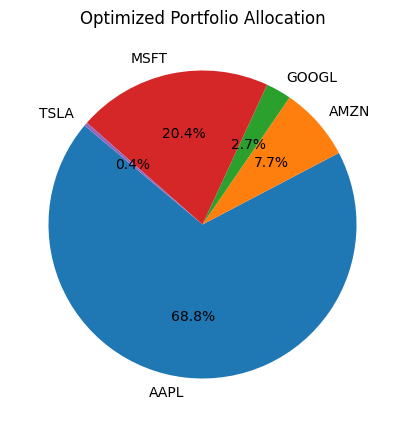

In [ ]:
# Plot Portfolio Allocation
plt.figure(figsize=(10,5))
plt.pie(optimal_weights, labels=valid_tickers, autopct='%1.1f%%', startangle=140)
plt.title("Optimized Portfolio Allocation")
plt.show()


[*********************100%***********************]  8 of 8 completed


Optimal Portfolio Weights (Simulated Annealing): {'AAPL': 0.406521378596838, 'MSFT': 0.13033477905233645, 'GOOGL': 0.16481139632798875, 'AMZN': 0.021791100370523835, 'TSLA': 0.004722969547559298, 'XOM': 0.17465857873523544, 'JNJ': 0.06261099305947745, 'BND': 0.03454880431004074}
MPT Portfolio Weights: {'AAPL': 0.07326328606383523, 'MSFT': 0.0032680059394426765, 'GOOGL': 0.7202218628741957, 'AMZN': 0.004670827068405306, 'TSLA': 0.06325627124746969, 'XOM': 0.05131413478293398, 'JNJ': 0.00977450702492965, 'BND': 0.07423110499878786}


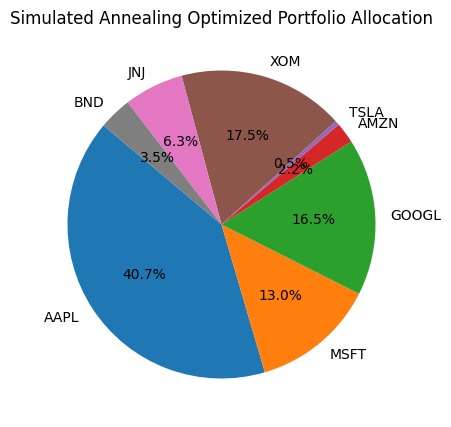

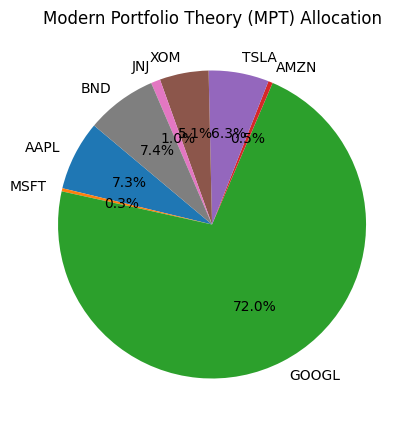

Sharpe Ratio (Simulated Annealing): -1.7534
Sharpe Ratio (MPT): -4.6453


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Quantum-Inspired Portfolio Optimization with Advanced Metrics
class QuantumInspiredPortfolioOptimizer:
    def __init__(self, returns, risk_tolerance=0.5, iterations=5000, temp=1.0, cooling_rate=0.995):
        self.returns = returns
        self.n_assets = returns.shape[1]
        self.risk_tolerance = risk_tolerance
        self.iterations = iterations
        self.temp = temp
        self.cooling_rate = cooling_rate
        self.cov_matrix = returns.cov()

    def portfolio_return(self, weights):
        return np.sum(weights * self.returns.mean())

    def portfolio_risk(self, weights):
        return np.sqrt(weights.T @ self.cov_matrix @ weights)

    def sharpe_ratio(self, weights, risk_free_rate=0.02):
        return (self.portfolio_return(weights) - risk_free_rate) / (self.portfolio_risk(weights) + 1e-6)

    def sortino_ratio(self, weights):
        returns = self.returns @ weights
        downside_risk = np.sqrt(np.mean(np.minimum(returns, 0) ** 2))
        return self.portfolio_return(weights) / (downside_risk + 1e-6)

    def cvar(self, weights, alpha=0.05):
        portfolio_returns = self.returns @ weights
        var_threshold = np.percentile(portfolio_returns, alpha * 100)
        return -np.mean(portfolio_returns[portfolio_returns <= var_threshold])

    def objective_function(self, weights):
        return -self.sortino_ratio(weights) + self.risk_tolerance * self.cvar(weights)

    def optimize(self):
        weights = np.random.rand(self.n_assets)
        weights /= np.sum(weights)
        best_weights = weights.copy()
        best_score = self.objective_function(weights)
        temp = self.temp

        for _ in range(self.iterations):
            new_weights = weights + np.random.normal(0, 0.1, self.n_assets)
            new_weights = np.abs(new_weights)
            new_weights /= np.sum(new_weights)
            new_score = self.objective_function(new_weights)

            if new_score < best_score or np.exp((best_score - new_score) / temp) > np.random.rand():
                weights = new_weights
                best_score = new_score
                best_weights = new_weights.copy()

            temp *= self.cooling_rate

        return best_weights

# Fetch Stock Data
def get_stock_data(tickers, start='2023-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end)
    if 'Adj Close' in data:
        data = data['Adj Close']
    elif 'Close' in data:
        print("Warning: 'Adj Close' column not found. Using 'Close' instead.")
        data = data['Close']
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' found in data")
    data.dropna(inplace=True)
    returns = data.pct_change().dropna()
    return data, returns

# Main Execution
# Diversified Portfolio including tech, energy, healthcare, and bonds
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'XOM', 'JNJ', 'BND']
data, returns = get_stock_data(tickers)

# Optimize Portfolio
optimizer = QuantumInspiredPortfolioOptimizer(returns)
optimal_weights_sa = optimizer.optimize()

# Benchmarking Against Modern Portfolio Theory (MPT)
def mpt_objective(weights, returns, risk_tolerance):
    mean_return = np.sum(weights * returns.mean())
    risk = np.sqrt(weights.T @ returns.cov() @ weights)
    return -mean_return + risk_tolerance * risk

constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1)] * len(tickers)
initial_guess = np.ones(len(tickers)) / len(tickers)

mpt_result = minimize(mpt_objective, initial_guess, args=(returns, 0.5), method='SLSQP', bounds=bounds, constraints=constraints)
mpt_weights = mpt_result.x

# Display Results
print("Optimal Portfolio Weights (Simulated Annealing):", dict(zip(tickers, optimal_weights_sa)))
print("MPT Portfolio Weights:", dict(zip(tickers, mpt_weights)))

# Plot Portfolio Allocation
plt.figure(figsize=(10,5))
plt.pie(optimal_weights_sa, labels=tickers[:len(optimal_weights_sa)], autopct='%1.1f%%', startangle=140)
plt.title("Simulated Annealing Optimized Portfolio Allocation")
plt.show()

plt.figure(figsize=(10,5))
plt.pie(mpt_weights, labels=tickers[:len(mpt_weights)], autopct='%1.1f%%', startangle=140)
plt.title("Modern Portfolio Theory (MPT) Allocation")
plt.show()

# Performance Comparison
sharpe_sa = optimizer.sharpe_ratio(optimal_weights_sa)
sharpe_mpt = (returns.mean().dot(mpt_weights) - 0.02) / (np.sqrt(mpt_weights.T @ returns.cov() @ mpt_weights) + 1e-6)
print(f"Sharpe Ratio (Simulated Annealing): {sharpe_sa:.4f}")
print(f"Sharpe Ratio (MPT): {sharpe_mpt:.4f}")

In [ ]:
# Calculate Performance Metrics for Simulated Annealing Optimized Portfolio
sortino_sa = optimizer.sortino_ratio(optimal_weights_sa)
cvar_sa = optimizer.cvar(optimal_weights_sa)

# Calculate Sortino Ratio for MPT Portfolio
def sortino_ratio_mpt(weights, returns):
    portfolio_returns = returns @ weights
    downside_risk = np.sqrt(np.mean(np.minimum(portfolio_returns, 0) ** 2))
    return (returns.mean().dot(weights)) / (downside_risk + 1e-6)

sortino_mpt = sortino_ratio_mpt(mpt_weights, returns)

# Calculate CVaR for MPT Portfolio
def cvar_mpt(weights, returns, alpha=0.05):
    portfolio_returns = returns @ weights
    var_threshold = np.percentile(portfolio_returns, alpha * 100)
    return -np.mean(portfolio_returns[portfolio_returns <= var_threshold])

cvar_mpt = cvar_mpt(mpt_weights, returns)

# Display All Performance Metrics
print("\n===== Portfolio Performance Metrics =====")
print(f"Sharpe Ratio (Simulated Annealing): {sharpe_sa:.4f}")
print(f"Sharpe Ratio (MPT): {sharpe_mpt:.4f}")
print(f"Sortino Ratio (Simulated Annealing): {sortino_sa:.4f}")
print(f"Sortino Ratio (MPT): {sortino_mpt:.4f}")
print(f"CVaR (Simulated Annealing): {cvar_sa:.4f}")
print(f"CVaR (MPT): {cvar_mpt:.4f}")


===== Portfolio Performance Metrics =====
Sharpe Ratio (Simulated Annealing): -1.7534
Sharpe Ratio (MPT): -4.6453
Sortino Ratio (Simulated Annealing): 0.2811
Sortino Ratio (MPT): 0.1587
CVaR (Simulated Annealing): 0.0184
CVaR (MPT): 0.0079


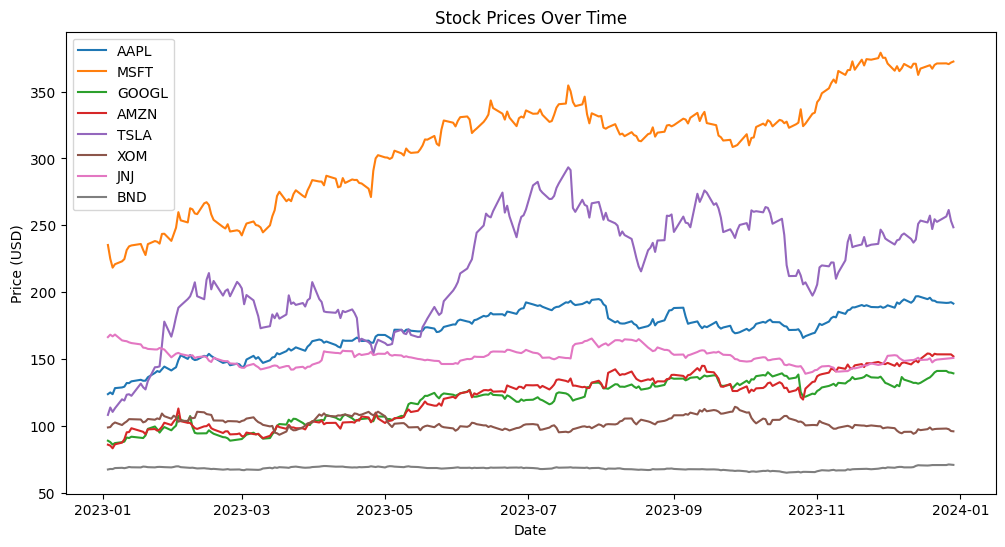

In [ ]:
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.legend()
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

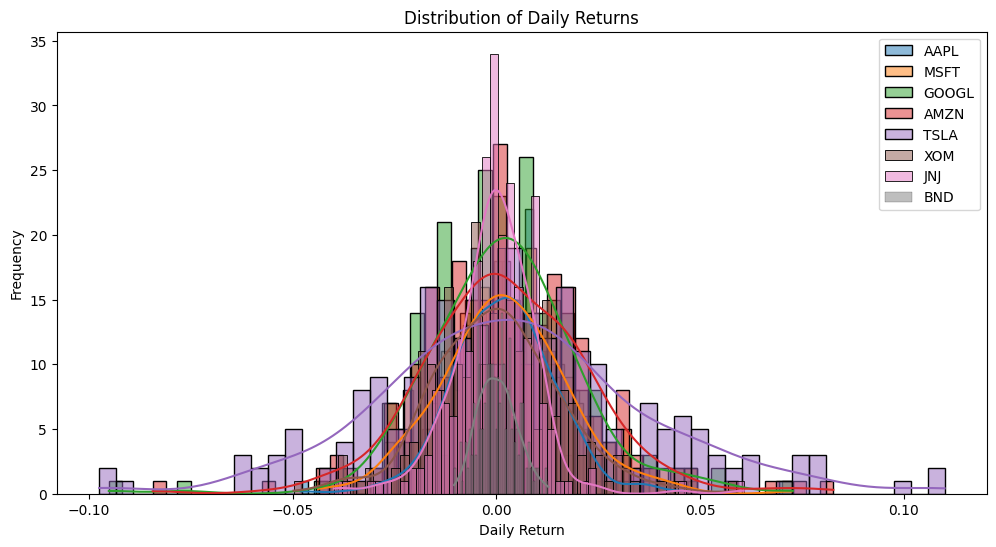

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
for ticker in tickers:
    sns.histplot(returns[ticker], bins=50, kde=True, label=ticker)
plt.legend()
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


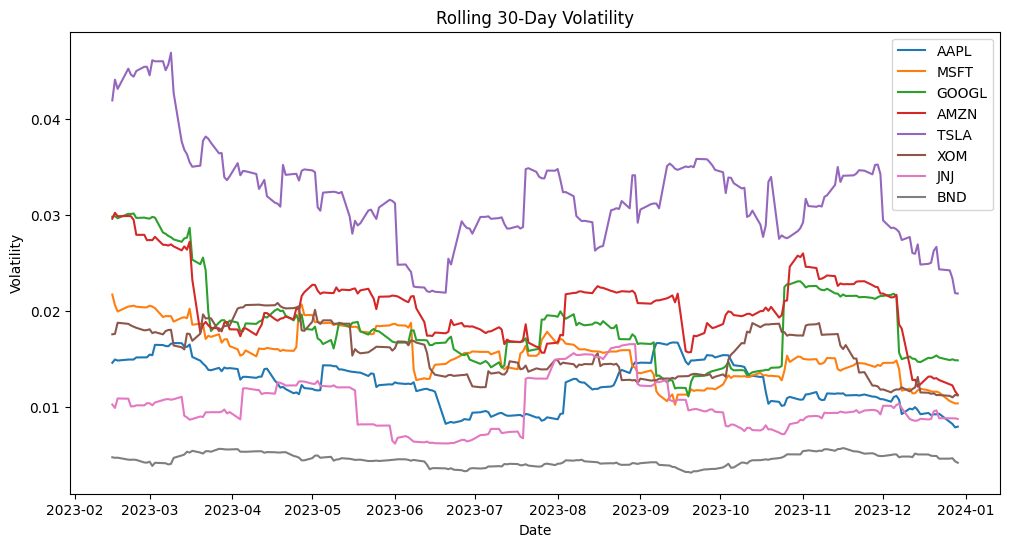

In [ ]:
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(returns[ticker].rolling(window=30).std(), label=ticker)
plt.legend()
plt.title("Rolling 30-Day Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

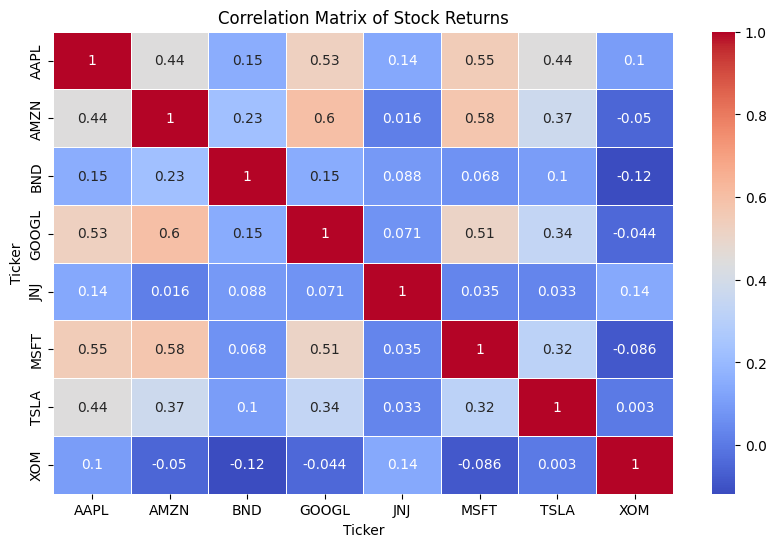

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Stock Returns")
plt.show()


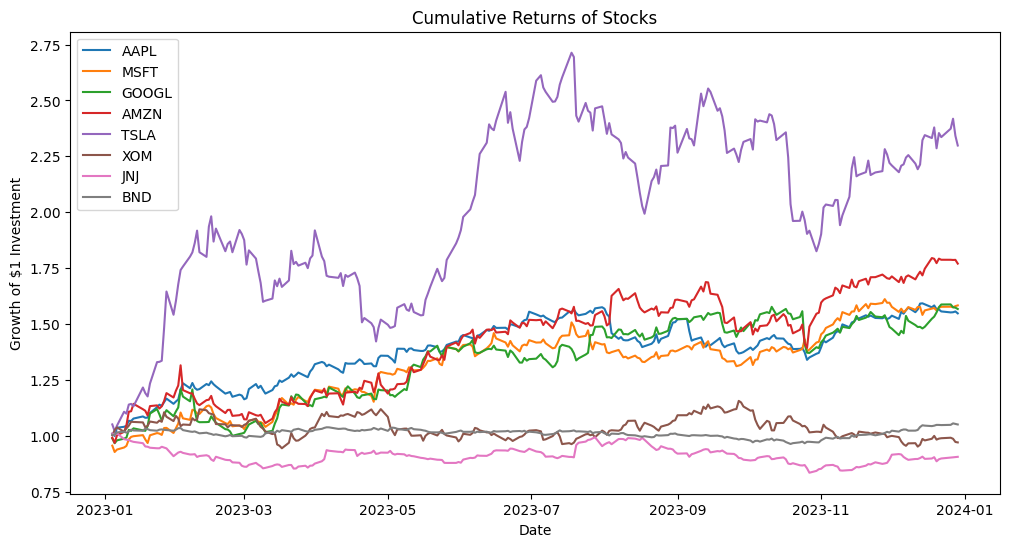

In [ ]:
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot((1 + returns[ticker]).cumprod(), label=ticker)
plt.legend()
plt.title("Cumulative Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.show()


In [ ]:
VaR_95 = returns.quantile(0.05)  # 5% worst-case loss
print("Value at Risk (95% confidence level):\n", VaR_95)


Value at Risk (95% confidence level):
 Ticker
AAPL    -0.017176
AMZN    -0.027312
BND     -0.006635
GOOGL   -0.025086
JNJ     -0.016086
MSFT    -0.022940
TSLA    -0.050141
XOM     -0.022738
Name: 0.05, dtype: float64


In [ ]:
sharpe_ratios = (returns.mean() - 0.02) / returns.std()
print("Sharpe Ratios:\n", sharpe_ratios)


Sharpe Ratios:
 Ticker
AAPL    -1.445108
AMZN    -0.840597
BND     -4.281476
GOOGL   -0.940532
JNJ     -1.950865
MSFT    -1.139279
TSLA    -0.485662
XOM     -1.275571
dtype: float64
